In [1]:
import pandas as pd
import numpy as np

In [2]:
df_students_exam = pd.read_csv("exams.csv")

# Get Info

In [3]:
df_students_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df_students_exam_copy=df_students_exam.copy()

In [5]:
df_students_exam_copy["math_100"]=df_students_exam["math score"][df_students_exam["math score"] > 99] #fake column for missing values


In [6]:
df_students_exam_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   math_100                     14 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
df_students_exam_copy.describe()

,math score,reading score,writing score,math_100
count,1000.000000,1000.000000,1000.000000,14.0
mean,66.396000,69.002000,67.738000,100.0
std,15.402871,14.737272,15.600985,0.0
min,13.000000,27.000000,23.000000,100.0
25%,56.000000,60.000000,58.000000,100.0
50%,66.500000,70.000000,68.000000,100.0
75%,77.000000,79.000000,79.000000,100.0
max,100.000000,100.000000,100.000000,100.0


In [8]:
df_students_exam_copy.describe(include=['object'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


# Missing Data

In [9]:
(df_students_exam_copy['math_100'].notnull().sum()/df_students_exam_copy.shape[0])*100 

1.4000000000000001

In [10]:
df_students_exam_copy["math_qualified"]=df_students_exam["math score"][df_students_exam["math score"] > 60]

In [11]:
df_students_exam_copy["math score"].describe()

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

# Duplicated

In [5]:
df_students_exam_copy=df_students_exam.copy()

In [6]:
df_students_exam_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#df_students_exam_copy[(df_students_exam_copy["math score"] > 90)].info()
df_students_exam_copy[(df_students_exam_copy["math score"] > 90)].shape

(55, 8)

In [11]:
# Create duplicate sample by append some data from original dataset.
df_students_exam_copy_duplicated = pd.concat([df_students_exam_copy,df_students_exam_copy[df_students_exam_copy["math score"] > 90]]) 
df_students_exam_copy_duplicated.reset_index(inplace=True)
df_students_exam_copy_duplicated.tail()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_100
1050,881,male,group B,master's degree,standard,none,99,81,87,NaN
1051,935,male,group D,some high school,standard,none,91,77,72,NaN
1052,940,male,group E,associate's degree,free/reduced,completed,92,79,77,NaN
1053,959,male,group D,master's degree,standard,completed,91,84,83,NaN
1054,964,male,group E,bachelor's degree,standard,none,100,83,86,100.0


In [10]:
# Print the count of duplicated rows
df_students_exam_copy_duplicated.duplicated().sum()

55

In [13]:
# Print all duplicated row with keep=False
df_students_exam_copy_duplicated.loc[df_students_exam_copy_duplicated.duplicated(keep=False)]

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_100
7,7,male,group E,some college,standard,completed,93,88,84,NaN
10,10,male,group E,some college,standard,completed,99,83,85,NaN
39,39,male,group E,associate's degree,standard,none,98,81,77,NaN
44,44,male,group E,high school,standard,none,100,88,87,100.0
87,87,male,group D,some college,standard,none,97,93,88,NaN
...,...,...,...,...,...,...,...,...,...,...
1050,881,male,group B,master's degree,standard,none,99,81,87,NaN
1051,935,male,group D,some high school,standard,none,91,77,72,NaN
1052,940,male,group E,associate's degree,free/reduced,completed,92,79,77,NaN
1053,959,male,group D,master's degree,standard,completed,91,84,83,NaN


In [14]:
# Have same scores in all three exams
df_students_exam_copy.duplicated(subset=['math score','reading score','writing score']).sum()


21

In [15]:
df_students_exam_copy.loc[df_students_exam_copy.duplicated(subset=['math score','reading score','writing score'],keep=False)].sort_values(by=['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_100
681,male,group C,some high school,free/reduced,completed,41,52,47,NaN
111,female,group D,some high school,standard,none,41,52,47,NaN
399,female,group A,some college,free/reduced,completed,53,70,69,NaN
673,female,group B,associate's degree,free/reduced,none,53,70,69,NaN
882,female,group B,associate's degree,standard,none,60,62,58,NaN
868,male,group B,master's degree,free/reduced,none,60,62,58,NaN
647,male,group D,some college,standard,completed,63,70,71,NaN
731,female,group D,some college,standard,none,63,70,71,NaN
166,male,group B,bachelor's degree,standard,none,66,64,58,NaN
242,male,group D,some high school,standard,none,66,64,58,NaN


# applymap vs transform

In [51]:
np.random.seed([3,1415])
df = pd.DataFrame(np.random.randint(10, size=(6, 4)), columns=list('ABCD'))


In [52]:
df

,A,B,C,D
0,0,2,7,3
1,8,7,0,6
2,8,6,0,2
3,0,4,9,7
4,3,2,4,3
5,3,6,7,7


In [66]:
df.applymap(lambda x: x*x)

,A,B,C,D
0,0,4,49,9
1,64,49,0,36
2,64,36,0,4
3,0,16,81,49
4,9,4,16,9
5,9,36,49,49


In [72]:
df * df == (df.applymap(lambda x: x*x))

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True


In [68]:
df.mean() + df

,A,B,C,D
0,3.666667,6.5,11.5,7.666667
1,11.666667,11.5,4.5,10.666667
2,11.666667,10.5,4.5,6.666667
3,3.666667,8.5,13.5,11.666667
4,6.666667,6.5,8.5,7.666667
5,6.666667,10.5,11.5,11.666667


In [70]:
df.transform(lambda x: x+x.mean()) == (df.mean() + df)

,A,B,C,D
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
5,True,True,True,True


In [83]:
df["A"].map(lambda x: x*x) == df["A"].transform(lambda x: x*x)

0    True
1    True
2    True
3    True
4    True
5    True
Name: A, dtype: bool

# Discretization and Binning

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
df_students_exam_copy=df_students_exam.copy()

array([[<AxesSubplot: title={'center': 'math score'}>,
        <AxesSubplot: title={'center': 'reading score'}>],
       [<AxesSubplot: title={'center': 'writing score'}>,
        <AxesSubplot: >]], dtype=object)

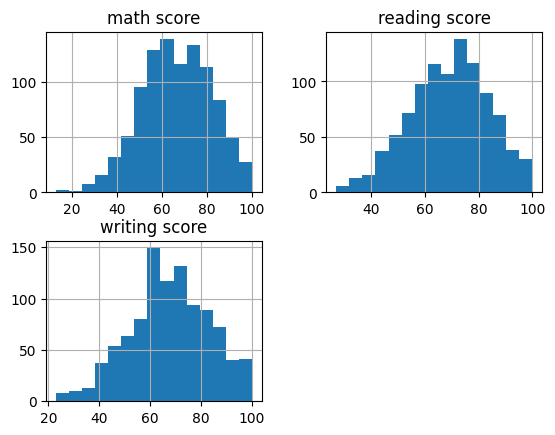

In [25]:
df_students_exam_copy[["math score","reading score","writing score"]].hist(bins=15)

(array([0.00022989, 0.00103448, 0.00333333, 0.00804598, 0.01781609,
        0.02402299, 0.02091954, 0.02103448, 0.01310345, 0.0054023 ]),
 array([ 13. ,  21.7,  30.4,  39.1,  47.8,  56.5,  65.2,  73.9,  82.6,
         91.3, 100. ]),
 <BarContainer object of 10 artists>)

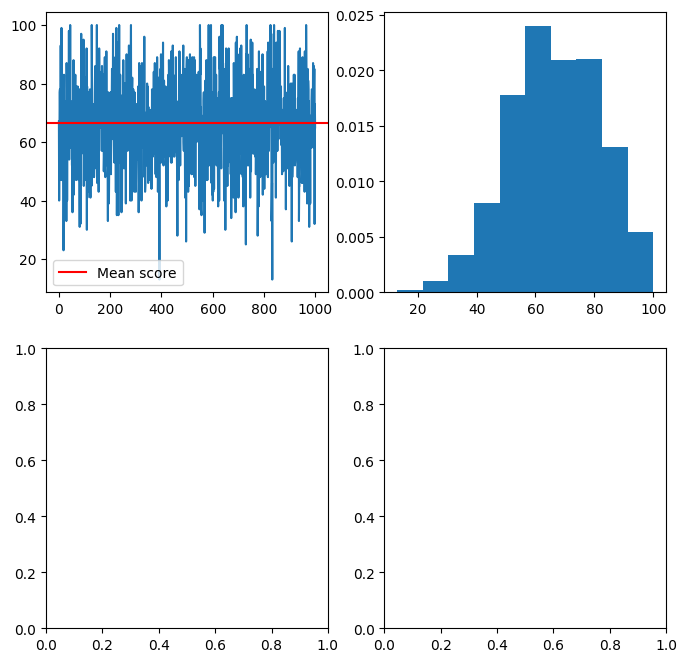

In [27]:
x = df_students_exam_copy.index
y = df_students_exam_copy["math score"]
y_mean = y.mean()
score_cuts = pd.qcut(df_students_exam_copy["math score"],4)
score_cuts_count = df_students_exam_copy["math score"].groupby(score_cuts).count()
fig , ax= plt.subplots(nrows=2,ncols=2,figsize=(8,8))
ax[0][0].plot(x,y)
ax[0][0].axhline(y_mean,color="red",label="Mean score")
ax[0][0].legend()
ax[0][1].hist(y,density=True)
#ax[1][0].barh(score_cuts_count)

In [188]:
score_cuts = pd.qcut(df_students_exam_copy["math score"],4)

<AxesSubplot: ylabel='math score'>

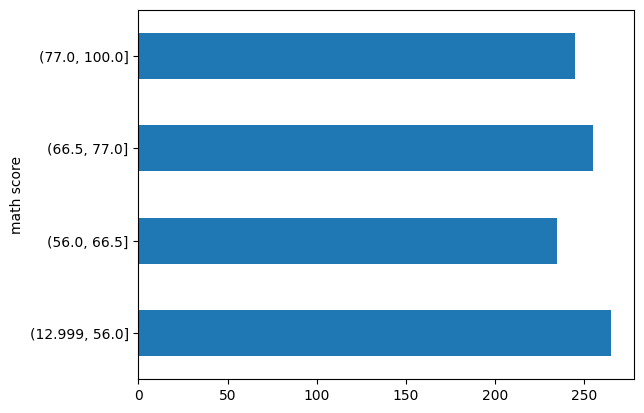

In [228]:
df_students_exam_copy["math score"].groupby(score_cuts).count().plot.barh()

# Detecting and Filtering Outliers

In [23]:
df_students_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
math_scores = df_students_exam["math score"]

In [25]:
(np.abs(math_scores)>80).any()

True

In [26]:
math_scores.quantile(0.99)

100.0

In [27]:
math_scores.describe()

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math score, dtype: float64

In [26]:
from numpy import mean
from numpy import std

In [27]:
math_scores[(math_scores>=mean(math_scores)+std(math_scores)*2)].count(), math_scores[(math_scores<=mean(math_scores)-std(math_scores)*2)].count()

(20, 23)

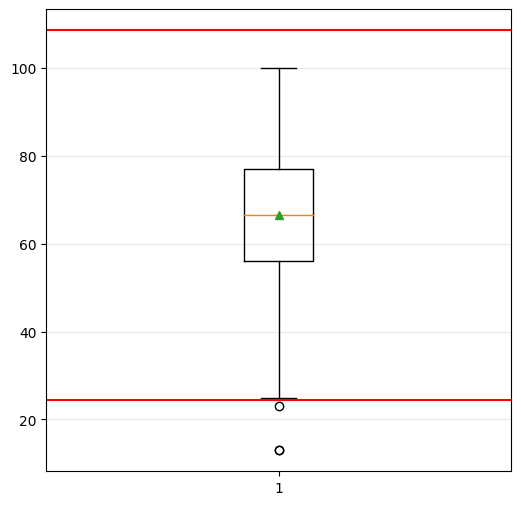

In [31]:
math_scores_q1 = math_scores.quantile(0.25)
math_scores_q3 = math_scores.quantile(0.75)
math_scores_iqr = math_scores_q3 - math_scores_q1 # caculate IQR
low_lim = math_scores_q1 - 1.5 * math_scores_iqr
high_lim = math_scores_q3 + 1.5 * math_scores_iqr
#math_scores_q1,math_scores_q3,low_lim
fig , ax= plt.subplots(figsize=(6,6))
box = ax.boxplot(math_scores,showmeans=True)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.axhline(low_lim,color="red")
ax.axhline(high_lim,color="red") # Higher than high cap
plt.show()


In [21]:
df_students_exam["math score"].corr(df_students_exam["reading score"]),df_students_exam["reading score"].corr(df_students_exam["math score"])

(0.8193975445486525, 0.8193975445486525)

In [33]:
df_students_exam.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


In [30]:
import seaborn as sns

In [28]:
df_students_exam.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


<AxesSubplot: >

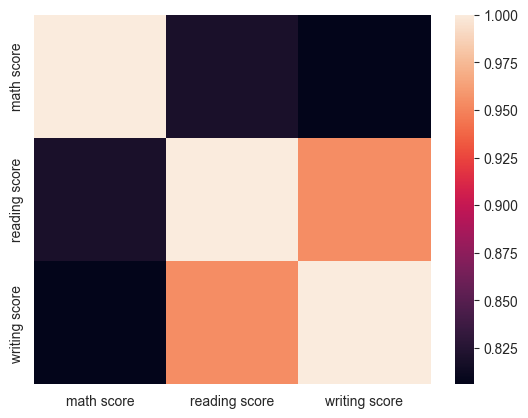

In [31]:
sns.set_style("dark")
sns.heatmap(df_students_exam.corr(numeric_only=True))

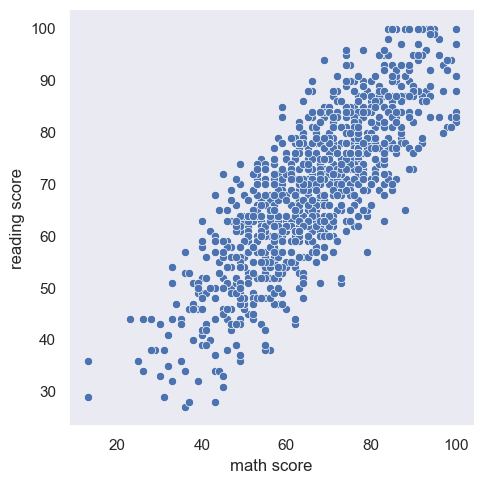

In [19]:
#df_students_exam[["math score","reading score"]].plot.scatter()
#df_students_exam.describe()
sns.relplot(data=df_students_exam,x="math score",y="reading score")